<center>
<img src="logo.png" height="900"> 
</center>


# Контрольная работа :)

In [1]:
import numpy as np
import pandas as pd

from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot') # стиль для графиков
%matplotlib inline

В файле `cr.csv` лежат результаты контрольной работы, которая проводилась в Вышке на факультете "Э".  По мнению студентов эти оценки смещённые, несостоятельные и ужасно неэффективные. Но это уже совершенно другая история. Подгрузим файлик и посмотрим на него!  

In [2]:
df = pd.read_csv('cr.csv', sep='\t')
print(df.shape)
df.head()

(389, 20)


,contest_login,fraud,k1a,k1b,k1c,k1d,k1e,k1f,k1,k2a,k2b,k2c,k2d,k2e,k2f,k2,k3a,k3b,k3c,k3
0,eds_python_2020_1,0.0,10.0,10.0,20.0,30.0,4.0,22.0,10.1,20.0,10.0,20.0,20.0,20.0,20.0,11.0,35.0,0.0,27.0,6.2
1,eds_python_2020_2,1.0,9.0,10.0,20.0,NaN,16.0,12.0,6.7,NaN,5.0,NaN,20.0,20.0,20.0,6.5,35.0,29.0,22.0,8.6
2,eds_python_2020_3,0.0,2.0,10.0,20.0,NaN,20.0,30.0,8.2,20.0,5.0,NaN,20.0,20.0,20.0,8.5,28.0,2.0,0.0,3.0
3,eds_python_2020_4,1.0,10.0,10.0,20.0,NaN,16.0,14.0,7.0,20.0,10.0,NaN,20.0,20.0,20.0,9.0,30.0,38.0,0.0,6.8
4,eds_python_2020_5,2.0,10.0,10.0,12.0,0.0,16.0,22.0,7.0,20.0,10.0,NaN,20.0,20.0,20.0,9.0,0.0,0.0,0.0,0.0


__Описание колонок:__


* `contest_login` - уникальный идентификатор студента
* `fraud` - в списывании скольки задач был уличён студент 
* `k1` - результат за первую контрольную, `k1a - k1f` в разбивке по задачам
* `k2` - результат за вторую контрольную, `k2a - k2f` в разбивке по задачам
* `k3` - результат за третью контрольную, `k3a - k3с` в разбивке по задачам

__а) Распределение результатов контрольной__ 

- Запишите все оценки за первую контрольную в переменную `x`, все пропуски удалите
- Найдите среднее и стандартное отклонение (используйте несмещённую оценку) 
- Постройте гистограмму результатов за первую контрольную 
- На этой же картинке постройте плотность нормального распределения со средним и стандартным отклонением, посчитанными выше

Похоже ли эмпирическое распределение на нормальное? 

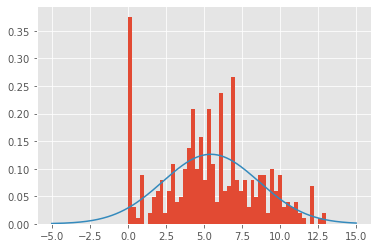

In [3]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

x = df.k1
x.isnull().sum()
x=x.dropna()
x_mean = x.mean()
x_std = x.std(ddof=1)
x.hist(bins=50,density=True)
x_norm=x.values
xs=np.linspace(-5,15,300)
ys=stats.norm(loc=np.mean(x_norm),scale=np.std(x_norm,ddof=1)).pdf(xs)
plt.plot(xs,ys)
# your code here


In [4]:
# проверка, что среднее и стандартное откланение посчитаны корректно
assert np.abs(x_mean - 5.4478149100) < 1e-5

# похожие тесты на другие части задания скрыты от вас


По аналогии с тем, как это было сделано на лекции, проверьте с помощью теста Колмогорова-Смирнова гипотезу о нормальности: 

- Используйте функцию `kstest` из пакета `scipy`
- С помощью `.pvalue` вытащите из результатов теста p-значение, запишите его в переменную `pvalue`
- По аналогии запишите в `K` значение статистики Колмогорова
- Если p-значение оказалось больше $0.05$, гипотеза о нормальности данных не отвергается, и мы можем дальше использовать эту предпосылку

In [5]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

pvalue = stats.kstest(x_norm,"norm",args=(np.mean(x),np.std(x,ddof=1))).pvalue
K = stats.kstest(x_norm,"norm",args=(np.mean(x),np.std(x,ddof=1))).statistic
pvalue,K
# your code here


(0.2504927745102798, 0.05124747789637915)

In [6]:
# проверка, что pvalue найдено корректно
assert np.abs(K - 0.051247) < 1e-5

# похожие тесты на другие части задания скрыты от вас


Предположим невероятное! А именно, независимость и одинаковую распределённость наших наблюдений (никто не списывал контрольную друг у друга).

__б) Интервал для среднего.__ 

Постройте точный $95\%$-й доверительный интервал для ожидамоего результата за первую контрольную. В качестве оценки стандартного отклонения используйте несмещённый вариант, `ddof=1`. В переменные `left` и `right` запишите границы получившегося интервала. В переменную `delta` его ширину. 

In [16]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

n = x.count()
t_rv = stats.t(x.count() - 1)
alpha = 0.05
t_crit = t_rv.ppf(1 - alpha/2)
mu_hat = x.mean() 
var_hat = x.var(ddof=1)
left = mu_hat - t_crit*np.sqrt(var_hat/n)
right = mu_hat + t_crit*np.sqrt(var_hat/n)
delta=right-left
left
#alpha = 0.05
#mu_hat=x.mean()
#std_hat=x.std(ddof=1)/np.sqrt(x.count())
#stats.norm.interval(0.95, loc=mu_hat, scale=std_hat)
#left ,right = stats.norm.interval(0.95, loc=mu_hat, scale=std_hat)
#delta = right-left
#delta



# your code here


5.132472137442809

In [17]:
# проверка, что границы доверительного интервала найдены верно
assert np.abs(left - 5.13247213744281) < 1e-5

# похожие тесты на другие части задания скрыты от вас


__в) Ангелы и демоны__

Переменная`fraud` - в списывании скольки задач был уличён студент. Разобьём наши наблюдения на две группы: Ангелы и Демоны. У Ангелов `fraud == 0`, у Демонов `fraud > 0`. 

Запишите оценки за первую контрольную для ангелов в переменную `angels`, для демонов в `demons`. Все пропуски из выборки удалите. Постройте на общем фоне гистограмму распределения оценок за первую контрольную у Ангелов и Демонов. 

In [20]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

angels = df[df.fraud==0]
demons = df[df.fraud>0]
# your code here


109

In [19]:
# проверка того, сколько в выборке оказалось ангелов и демонов
assert len(angels) == 109

# похожие тесты на другие части задания скрыты от вас


__г) Интервал для разницы средних__ 

Постройте примерный $95\%$-й доверительный интервал для разницы ожидаемого результата за первую контрольную у Ангелов и Демонов без предположения о равенстве дисперсий (интервал Уэлча). Для оценки всех дисперсий используйте несмещённый вариант. Заполните все переменные, перечисленные ниже. 

In [32]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you
diff=angels.k1.mean()-demons.k1.mean()
na, nd=angels.k1.size,demons.k1.size
diff_std=np.sqrt(angels.k1.var(ddof=1)/na+demons.k1.var(ddof=1)/nd)
u = (angels.k1.var(ddof=1)/na+demons.k1.var(ddof=1)/nd)**2
d = (angels.k1.var(ddof=1)**2) / (na**2 * (na - 1)) + (demons.k1.var(ddof=1)**2)/ (nd**2* (nd - 1))
nu = u/d
left, right = stats.t.interval(0.95, df=nu, loc=diff, scale=diff_std)
delta = right-left    # ширина интервала
left,right, delta, nu
# your code here


(-0.8045581262764373,
 0.5469728051755148,
 1.3515309314519521,
 191.6860656421597)

In [31]:
# проверка, что границы доверительного интервала найдены верно
assert np.abs(left + 0.8045581262764373) < 1e-5

# похожие тесты на другие части задания скрыты от вас


Входит ли в получившийся доверительный интервал ноль? Как думаете, что это означает? 

__д) Интервал для дисперсии__ 

Предположим, что математическое ожидание результата за контрольную зависит от уровня подготовки, а дисперсия результата — от нервов. Постройте для отношения нервозности Демонов и Ангелов $95\%$ доверительный интервал. Для оценки всех дисперсий используйте несмещённый вариант. 

In [61]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you


angels = df[df.fraud==0].k1.values
demons = df[df.fraud>0].k1.values
alpha = 0.05
na, nd = angels.size-1,demons.size-1
var_a,var_d=angels.var(ddof=1),demons.var(ddof=1)
left =  var_d/var_a *stats.f(na,nd).ppf(alpha/2)   # левая граница интервала
right = var_d/var_a *stats.f(na,nd).ppf(1-alpha/2)  # правая граница интервала
delta = right-left  
left,right,na,nd


(0.6120428247687729, 1.1623835577954729, 108, 249)

In [59]:
# проверка, что границы доверительного интервала найдены верно
assert np.abs(left - 0.6120428247687726) < 1e-5

# похожие тесты на другие части задания скрыты от вас


Вошла ли в доверительный интервал единица? Как думаете, что это означает? 

__е) Ангелы и демоны решают задачки__ 

Нарисуйте картинку для корреляционной матрицы по задачам первой контрольной для всех наблюдений, отдельно для Ангелов и Демонов. Пропуски заполните нулями. Будем считать, что если у студента нет оценки, он не выполнял это задание. Для подсчёта корреляций используйте метод `.corr`. Для отрисовки матриц функцию `heatmap` из пакета `seaborn`. Для ангелов неплохо подойдёт цветовая схема `YlGnBu`. Для демонов подходит схема `gist_heat_r`.

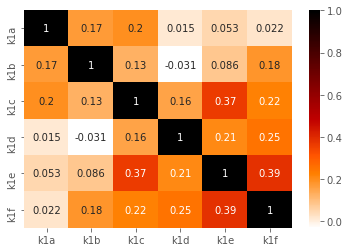

In [102]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

tasks = ['k1a', 'k1b', 'k1c', 'k1d', 'k1e', 'k1f']
df_angels=df[tasks][df.fraud==0].fillna(0)
df_demons=df[tasks][df.fraud>0].fillna(0)
#fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
#sns.heatmap(df_angels.corr(),cmap='YlGnBu',annot=True)
sns.heatmap(df_demons.corr(),cmap='gist_heat_r',annot=True)



# your code here


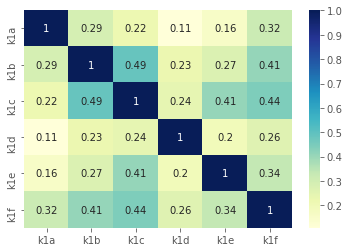

In [101]:
tasks = ['k1a', 'k1b', 'k1c', 'k1d', 'k1e', 'k1f']
df_angels=df[tasks][df.fraud==0].fillna(0)
df_demons=df[tasks][df.fraud>0].fillna(0)
#fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
sns.heatmap(df_angels.corr(),cmap='YlGnBu',annot=True)

Между баллом за какие задачи самая высокая корреляция у Ангелов? В грейдер отправьте название колонок в порядке возрастания через запятую. __Например:__ `("k1a", "k1f")`. 

In [97]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

names_angels = ('k1b','k1c')
names_demons = ('k1e','k1f')
names_angels

# your code here


('k1b', 'k1c')

In [90]:
# проверка вашего ответа скрыта от вас

Как думаете, какие задачи было тяжелее всего списать? 

__ё) Доля написавших третью контрольную.__

Без буквы `ё` никуда, скажут нам [Пафнутий Чебышёв](https://ru.wikipedia.org/wiki/%D0%A7%D0%B5%D0%B1%D1%8B%D1%88%D1%91%D0%B2,_%D0%9F%D0%B0%D1%84%D0%BD%D1%83%D1%82%D0%B8%D0%B9_%D0%9B%D1%8C%D0%B2%D0%BE%D0%B2%D0%B8%D1%87) и [Лёв Толстой](https://arzamas.academy/special/ruslit/writers/tolstoy).  

У студентов был выбор: писать или не писать третью контрольную. Если в колонке `k3` стоит $0$, значит студент не стал это делать. Постройте асимптотический $95\%$-й доверительный интервал для разницы долей Ангелов и Демонов, которые решили писать третью контрольную. 

__Примечание:__ На практике, если мы пользуемся асимптотическими доверительными интервалами, мы можем искать границы двумя способами:

* __Первый__ состоит в том, что мы оцениваем стандартное отклонение с помощью $\sqrt{\hat{p} \cdot (1 - \hat{p})} = \sqrt{\frac{1}{n} \cdot \sum_{i=1}^n (x_i - \bar{x})^2}$. 
* __Второй способ__ состоит в том, чтобы оценить стандартное отклонение как  $\sqrt{\frac{1}{n-1} \cdot \sum_{i=1}^n (x_i - \bar{x})^2}$. 

В плане асимптотики это не влияет на выводы, так как обе этих оценки состоятельно оценивают дисперсию. Можно пользоваться любым. Однако, чтобы с грейдером не было проблем и задание зачлось, воспользуйтесь первым способом. 

In [144]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you
df_angels_all=df[df.fraud==0]
df_demons_all=df[df.fraud>0]
na=df_angels_all.shape[0]
nd=df_demons_all.shape[0]
df_angels = df[df.fraud==0][df.k3!=0]
df_demons=  df[df.fraud>0][df.k3!=0]
angels_mu_hat=df_angels.shape[0]/na
demons_mu_hat=df_demons.shape[0]/nd
mu_hat=angels_mu_hat-demons_mu_hat
angels_mu_hat,demons_mu_hat
std_hat=np.sqrt(angels_mu_hat*(1-angels_mu_hat)/na+demons_mu_hat*(1-demons_mu_hat)/nd)
alpha = 0.05
left,right=stats.norm.interval(1-alpha, loc=mu_hat, scale=std_hat)
delta=right-left
delta
#left =  ...     # левая граница интервала
#right = ...     # правая граница интервала
#delta = ...     # ширина интервала

# your code here


0.22190682220252

In [140]:
# проверка, что границы доверительного интервала найдены верно
assert np.abs(left + 0.1885) < 1e-3

# похожие тесты на другие части задания скрыты от вас


__ж) Снова разница средних__ 

Посмотрим на результаты студентов в динамике. Постройте точный $95\%$ доверительный интервал для средней разницы оценок за вторую и первую контрольные. Пропуски в данных заполните нулями. 

Входит ли в доверительный интервал ноль? Как думаете, что это означает? 

In [190]:
df=df.fillna(0)


,contest_login,fraud,k1a,k1b,k1c,k1d,k1e,k1f,k1,k2a,k2b,k2c,k2d,k2e,k2f,k2,k3a,k3b,k3c,k3
0,eds_python_2020_1,0.0,10.0,10.0,20.0,30.0,4.0,22.0,10.1,20.0,10.0,20.0,20.0,20.0,20.0,11.0,35.0,0.0,27.0,6.2
1,eds_python_2020_2,1.0,9.0,10.0,20.0,0.0,16.0,12.0,6.7,0.0,5.0,0.0,20.0,20.0,20.0,6.5,35.0,29.0,22.0,8.6
2,eds_python_2020_3,0.0,2.0,10.0,20.0,0.0,20.0,30.0,8.2,20.0,5.0,0.0,20.0,20.0,20.0,8.5,28.0,2.0,0.0,3.0
3,eds_python_2020_4,1.0,10.0,10.0,20.0,0.0,16.0,14.0,7.0,20.0,10.0,0.0,20.0,20.0,20.0,9.0,30.0,38.0,0.0,6.8
4,eds_python_2020_5,2.0,10.0,10.0,12.0,0.0,16.0,22.0,7.0,20.0,10.0,0.0,20.0,20.0,20.0,9.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,eds_python_2020_384,1.0,0.0,10.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,13.0,20.0,0.0,0.0,3.3,35.0,55.0,4.0,9.4
385,eds_python_2020_385,3.0,0.0,0.0,0.0,0.0,4.0,0.0,0.4,0.0,0.0,0.0,0.0,20.0,0.0,2.0,35.0,0.0,5.0,4.0
386,eds_python_2020_386,1.0,10.0,10.0,20.0,0.0,10.0,12.0,6.2,0.0,0.0,7.0,15.0,10.0,15.0,4.7,25.0,40.0,15.0,8.0
387,eds_python_2020_387,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [199]:
df['di']=df.k2-df.k1
df

,contest_login,fraud,k1a,k1b,k1c,k1d,k1e,k1f,k1,k2a,...,k2c,k2d,k2e,k2f,k2,k3a,k3b,k3c,k3,di
0,eds_python_2020_1,0.0,10.0,10.0,20.0,30.0,4.0,22.0,10.1,20.0,...,20.0,20.0,20.0,20.0,11.0,35.0,0.0,27.0,6.2,0.9
1,eds_python_2020_2,1.0,9.0,10.0,20.0,0.0,16.0,12.0,6.7,0.0,...,0.0,20.0,20.0,20.0,6.5,35.0,29.0,22.0,8.6,-0.2
2,eds_python_2020_3,0.0,2.0,10.0,20.0,0.0,20.0,30.0,8.2,20.0,...,0.0,20.0,20.0,20.0,8.5,28.0,2.0,0.0,3.0,0.3
3,eds_python_2020_4,1.0,10.0,10.0,20.0,0.0,16.0,14.0,7.0,20.0,...,0.0,20.0,20.0,20.0,9.0,30.0,38.0,0.0,6.8,2.0
4,eds_python_2020_5,2.0,10.0,10.0,12.0,0.0,16.0,22.0,7.0,20.0,...,0.0,20.0,20.0,20.0,9.0,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,eds_python_2020_384,1.0,0.0,10.0,0.0,0.0,0.0,0.0,1.0,0.0,...,13.0,20.0,0.0,0.0,3.3,35.0,55.0,4.0,9.4,2.3
385,eds_python_2020_385,3.0,0.0,0.0,0.0,0.0,4.0,0.0,0.4,0.0,...,0.0,0.0,20.0,0.0,2.0,35.0,0.0,5.0,4.0,1.6
386,eds_python_2020_386,1.0,10.0,10.0,20.0,0.0,10.0,12.0,6.2,0.0,...,7.0,15.0,10.0,15.0,4.7,25.0,40.0,15.0,8.0,-1.5
387,eds_python_2020_387,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [206]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you
df['di']=df.k2-df.k1
diff=df.k2.mean()-df.k1.mean()
n1=df.k2.count()
n2=df.k1.count()
std=np.sqrt(df.di.var(ddof=1)/n)
alpha = 0.05
left,right=stats.t.interval(1-alpha,df=n, loc=diff, scale=std)
delta=right-left

#left =  ...     # левая граница интервала
#right = ...     # правая граница интервала
#delta = ...     # ширина интервала

# your code here


In [207]:
# проверка, что границы доверительного интервала найдены верно
assert np.abs(left + 1.4562881732820103) < 1e-5

# похожие тесты на другие части задания скрыты от вас


Входит ли в доверительный интервал ноль? Как думаете, что это означает? 

Это домашка подошла к концу. Поздравляю! Теперь вы умеете строить точные доверительные интервалы для нормальных выборок.